### `MODEL BUILDING -- LINEAR REGRESSION`

`SPLIT THE TRAIN AND TEST DATASET`

In [10]:
# !pip install pandas
import pandas as pd
# !pip install numpy
import numpy as np
# !pip install seaborn
import seaborn as sns
# !pip install matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# !pip install ipywidgets
import ipywidgets as widgets

`READ THE CLEANED DATASET`

In [11]:
df = pd.read_csv('Cleaned_df.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

`SPLIT THE DATASET INTO X AND Y`

In [12]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

`SPLIT THE DATASET INTO TRAIN AND TEST OF X AND Y`

In [13]:
# !pip install sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)

`CHECK FOR SHAPE OF TRAIN AND TEST SETS`

In [14]:
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (196159, 19)
Shape of x_test:  (49040, 19)
Shape of y_train:  (196159,)
Shape of y_test:  (49040,)


#### `FIT THE MODELS`

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_train,y_train)

`PREDICT THE MODEL`

In [16]:
y_pred = lr.predict(x_test)

#### `MODEL-1`

In [17]:
# !pip install statmodels
import statsmodels.api as sm
x_train_sm = x_train

x_train_sm = sm.add_constant(x_train_sm)

mlm = sm.OLS(y_train,x_train_sm).fit()

mlm.params
print(mlm.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:40:34   Log-Likelihood:            -1.2446e+06
No. Observations:              196159   AIC:                         2.489e+06
Df Residuals:                  196139   BIC:                         2.489e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

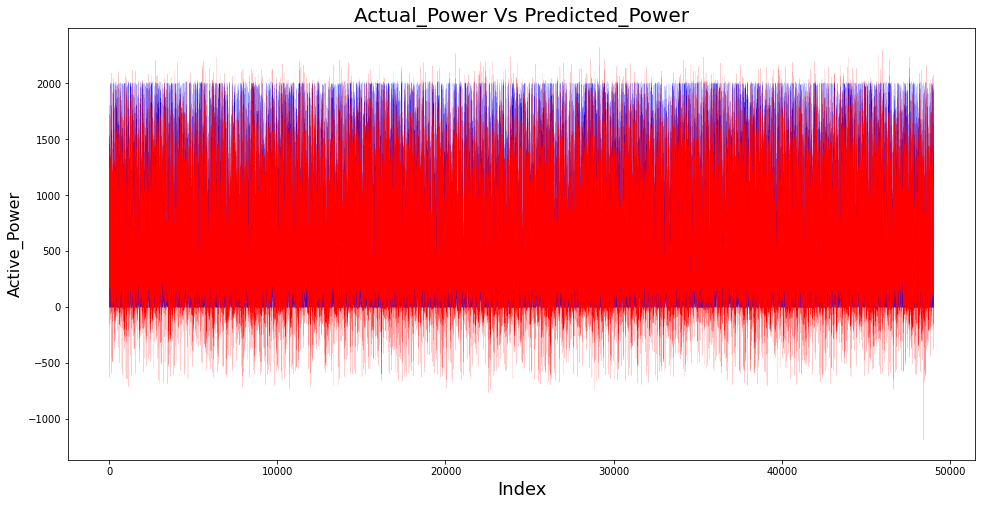

In [18]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

                              feature            VIF
0                    Avg_Ambient_Temp      70.956154
1                 Avg_Generator_Speed   83644.989518
2                     Avg_Nacelle_Pos       3.898009
3                     Avg_Pitch_Angle      13.630874
4                     Avg_Rotor_Speed   84271.377809
5                      Avg_Wind_Speed      44.248870
6                     Bearing_DE_Temp     615.214488
7                    Bearing_NDE_Temp     669.374913
8                Gearbox_bearing_Temp    2756.496545
9                    Gearbox_oil_Temp    2659.267301
10              Generator_wind_Temp_1  231529.737063
11              Generator_wind_Temp_2  232227.893434
12              Generator_wind_Temp_3    4572.275104
13          Generators_sliprings_Temp     450.132150
14           Hidraulic_group_pressure      81.460160
15  Nacelle_Misalignment_Avg_Wind_Dir       1.930151
16                  Trafo_1_wind_Temp     311.304992
17                  Trafo_2_wind_Temp     273.

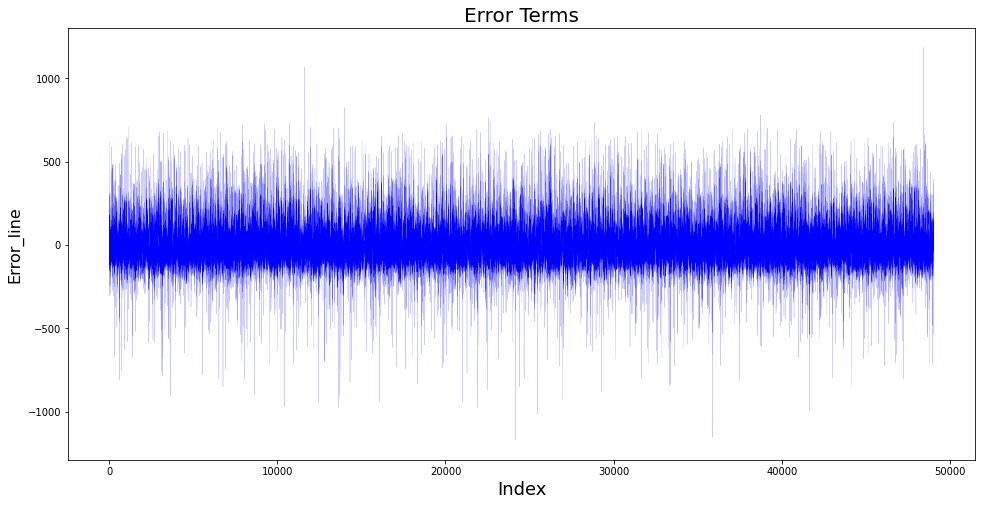

In [20]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 18890.960947349187
r_square_value : 0.938 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-2`

In [22]:
x1_train = x_train[['Avg_Ambient_Temp', 'Avg_Generator_Speed', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed',
                    'Avg_Wind_Speed', 'Bearing_DE_Temp', 'Bearing_NDE_Temp', 'Gearbox_bearing_Temp', 'Gearbox_oil_Temp',
                    'Generator_wind_Temp_1', 'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Nacelle_Misalignment_Avg_Wind_Dir', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]
x1_test = x_test[['Avg_Ambient_Temp', 'Avg_Generator_Speed', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed',
                    'Avg_Wind_Speed', 'Bearing_DE_Temp', 'Bearing_NDE_Temp', 'Gearbox_bearing_Temp', 'Gearbox_oil_Temp',
                    'Generator_wind_Temp_1', 'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Nacelle_Misalignment_Avg_Wind_Dir', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]

Avg_Nacelle_Pos -- varible is removed because of its significant value is more than 0.05.

In [23]:
lr1 = lr.fit(x1_train,y_train)

In [24]:
y_pred1 = lr1.predict(x1_test)

In [25]:
import statsmodels.api as sm
x1_train_sm = x1_train

x1_train_sm = sm.add_constant(x1_train_sm)

mlm1 = sm.OLS(y_train,x1_train_sm).fit()


mlm1.params
print(mlm1.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.639e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:40:49   Log-Likelihood:            -1.2446e+06
No. Observations:              196159   AIC:                         2.489e+06
Df Residuals:                  196140   BIC:                         2.489e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

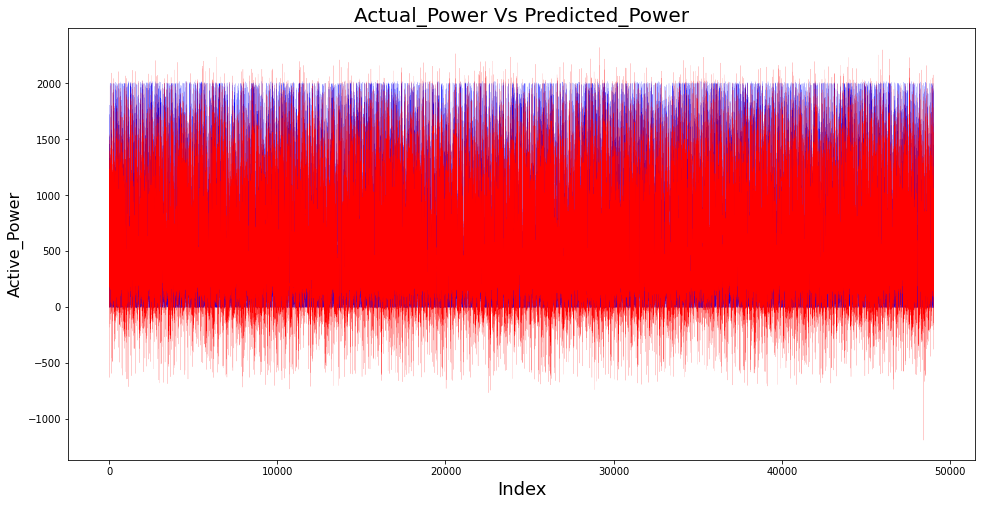

In [26]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred1, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x1_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x1_train.values, i) 
                          for i in range(len(x1_train.columns))] 
  
print(vif_data)

                              feature            VIF
0                    Avg_Ambient_Temp      70.755721
1                 Avg_Generator_Speed   83644.968373
2                     Avg_Pitch_Angle      13.620940
3                     Avg_Rotor_Speed   84271.360161
4                      Avg_Wind_Speed      44.235271
5                     Bearing_DE_Temp     615.113078
6                    Bearing_NDE_Temp     669.097227
7                Gearbox_bearing_Temp    2756.379755
8                    Gearbox_oil_Temp    2658.394396
9               Generator_wind_Temp_1  231153.373715
10              Generator_wind_Temp_2  231860.090841
11              Generator_wind_Temp_3    4571.090312
12          Generators_sliprings_Temp     446.646861
13           Hidraulic_group_pressure      81.459161
14  Nacelle_Misalignment_Avg_Wind_Dir       1.930145
15                  Trafo_1_wind_Temp     311.207540
16                  Trafo_2_wind_Temp     273.126137
17                  Trafo_3_wind_Temp     285.

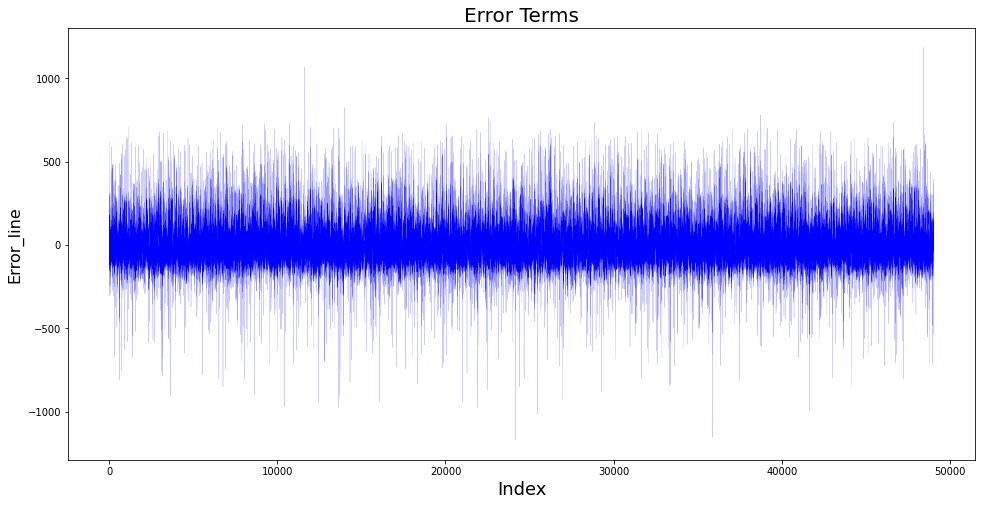

In [28]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred1)
r_squared = r2_score(y_test, y_pred1)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 18890.96745365323
r_square_value : 0.938 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-3`

In [30]:
x2_train = x_train[['Avg_Ambient_Temp', 'Avg_Generator_Speed', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed',
                    'Avg_Wind_Speed', 'Bearing_DE_Temp', 'Bearing_NDE_Temp', 'Gearbox_bearing_Temp', 'Gearbox_oil_Temp',
                    'Generator_wind_Temp_1', 'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]
x2_test = x_test[['Avg_Ambient_Temp', 'Avg_Generator_Speed', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed',
                    'Avg_Wind_Speed', 'Bearing_DE_Temp', 'Bearing_NDE_Temp', 'Gearbox_bearing_Temp', 'Gearbox_oil_Temp',
                    'Generator_wind_Temp_1', 'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]

Nacelle_Misalignment_Avg_Wind_Dir varible is removed because of its significant value is more than 0.05.

In [31]:
lr2 = lr.fit(x2_train,y_train)

In [32]:
y_pred2 = lr2.predict(x2_test)

In [33]:
import statsmodels.api as sm
x2_train_sm = x2_train

x2_train_sm = sm.add_constant(x2_train_sm)

mlm2 = sm.OLS(y_train,x2_train_sm).fit()

mlm2.params
print(mlm2.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.735e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:03   Log-Likelihood:            -1.2446e+06
No. Observations:              196159   AIC:                         2.489e+06
Df Residuals:                  196141   BIC:                         2.489e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

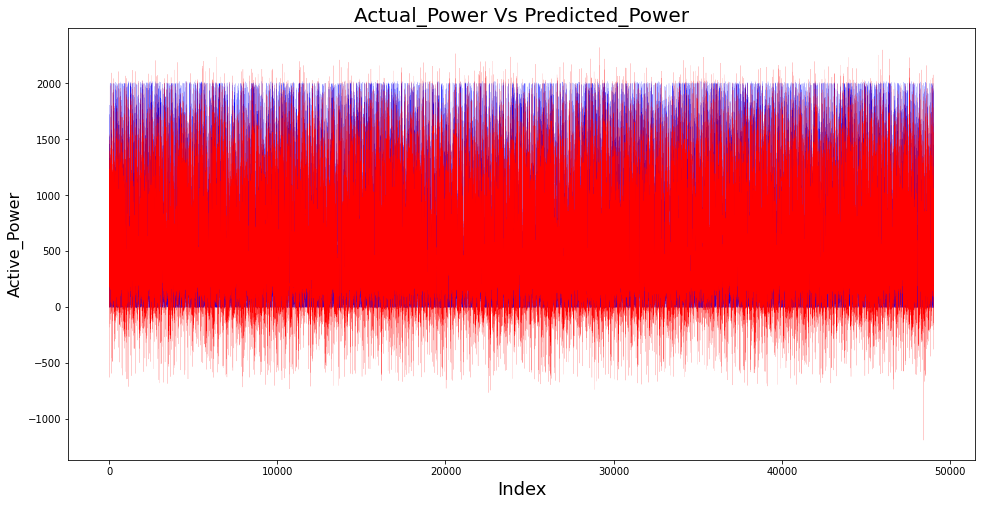

In [34]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred2, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x2_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x2_train.values, i) 
                          for i in range(len(x2_train.columns))] 
  
print(vif_data)

                      feature            VIF
0            Avg_Ambient_Temp      69.958895
1         Avg_Generator_Speed   83497.589288
2             Avg_Pitch_Angle      13.609280
3             Avg_Rotor_Speed   84131.728964
4              Avg_Wind_Speed      44.178478
5             Bearing_DE_Temp     615.044433
6            Bearing_NDE_Temp     669.020778
7        Gearbox_bearing_Temp    2755.936095
8            Gearbox_oil_Temp    2657.976214
9       Generator_wind_Temp_1  231150.900292
10      Generator_wind_Temp_2  231849.033783
11      Generator_wind_Temp_3    4567.485073
12  Generators_sliprings_Temp     442.858267
13   Hidraulic_group_pressure      81.452678
14          Trafo_1_wind_Temp     311.202159
15          Trafo_2_wind_Temp     273.080192
16          Trafo_3_wind_Temp     285.172116


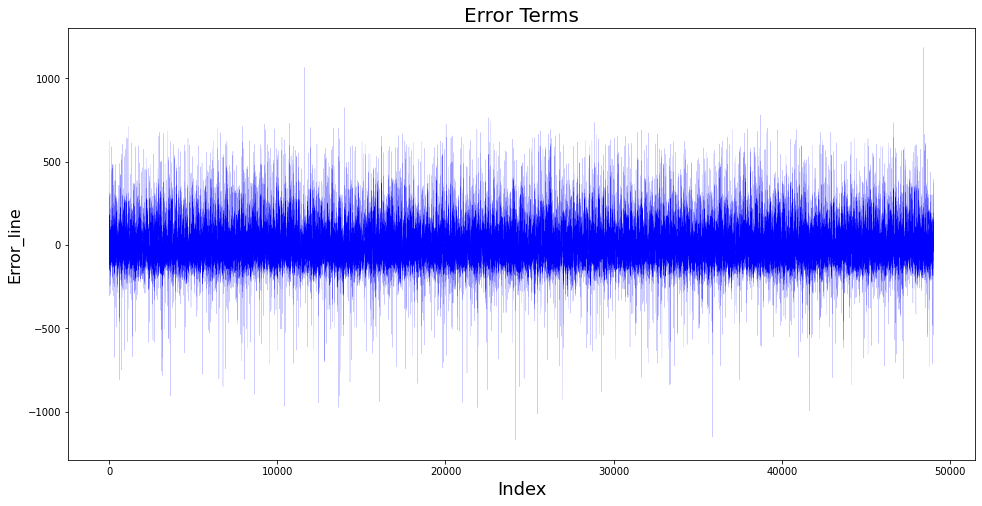

In [36]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred2, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred2)
r_squared = r2_score(y_test, y_pred2)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 18889.494881377803
r_square_value : 0.938 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-4`

In [38]:
x3_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed',
                    'Avg_Wind_Speed', 'Bearing_DE_Temp', 'Bearing_NDE_Temp', 'Gearbox_bearing_Temp', 'Gearbox_oil_Temp',
                    'Generator_wind_Temp_1', 'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]
x3_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed',
                    'Avg_Wind_Speed', 'Bearing_DE_Temp', 'Bearing_NDE_Temp', 'Gearbox_bearing_Temp', 'Gearbox_oil_Temp',
                    'Generator_wind_Temp_1', 'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]

'Avg_Generator_Speed' varible is removed because of its significant value is more than 0.05.

In [39]:
lr3 = lr.fit(x3_train,y_train)

In [40]:
y_pred3 = lr3.predict(x3_test)

In [41]:
import statsmodels.api as sm
x3_train_sm = x3_train

x3_train_sm = sm.add_constant(x3_train_sm)

mlm3 = sm.OLS(y_train,x3_train_sm).fit()

mlm3.params
print(mlm3.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.844e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:14   Log-Likelihood:            -1.2446e+06
No. Observations:              196159   AIC:                         2.489e+06
Df Residuals:                  196142   BIC:                         2.489e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

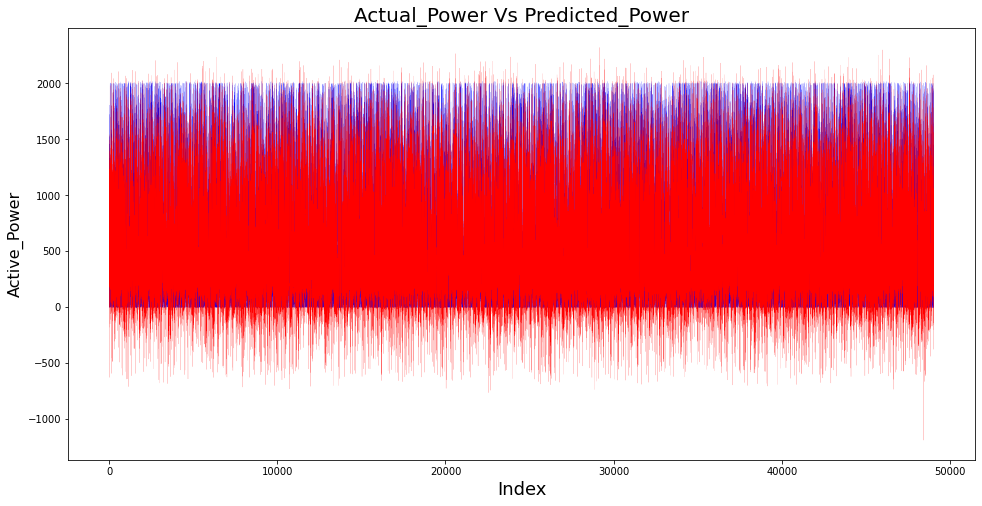

In [42]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred3, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x3_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x3_train.values, i) 
                          for i in range(len(x3_train.columns))] 
  
print(vif_data)

                      feature            VIF
0            Avg_Ambient_Temp      69.934265
1             Avg_Pitch_Angle      13.608803
2             Avg_Rotor_Speed     137.958877
3              Avg_Wind_Speed      43.805196
4             Bearing_DE_Temp     614.971703
5            Bearing_NDE_Temp     668.889859
6        Gearbox_bearing_Temp    2748.459206
7            Gearbox_oil_Temp    2653.258020
8       Generator_wind_Temp_1  231139.296838
9       Generator_wind_Temp_2  231830.976611
10      Generator_wind_Temp_3    4567.470518
11  Generators_sliprings_Temp     442.432227
12   Hidraulic_group_pressure      81.429600
13          Trafo_1_wind_Temp     311.197941
14          Trafo_2_wind_Temp     272.863521
15          Trafo_3_wind_Temp     285.012433


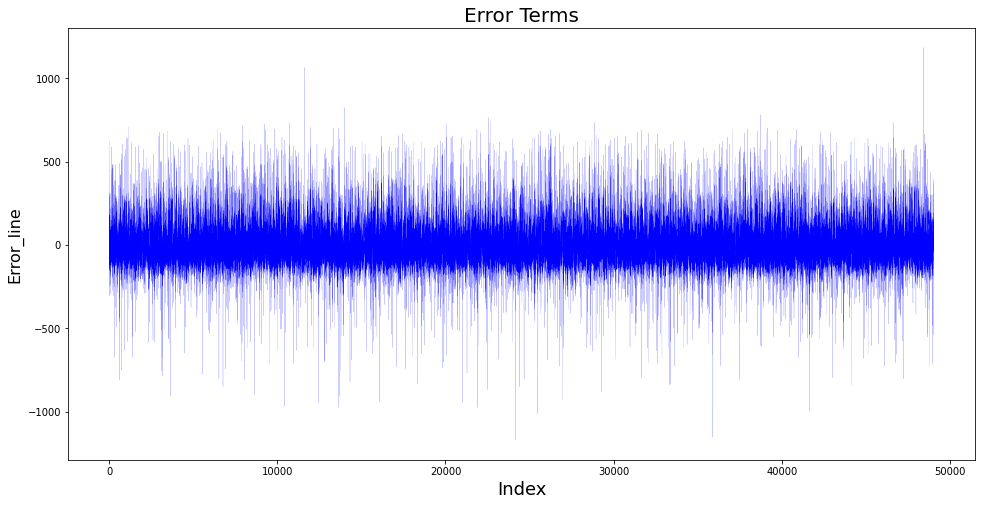

In [44]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred3, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred3)
r_squared = r2_score(y_test, y_pred3)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 18889.474403181845
r_square_value : 0.938 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-5`

In [46]:
x4_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1',
                    'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]
x4_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1',
                    'Generator_wind_Temp_2', 'Generator_wind_Temp_3', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp',
                    'Trafo_3_wind_Temp']]

'Bearing_NDE_Temp' & 'Bearing_DE_Temp' These varibles are Auto Correlated each other. So, i removed one variable ('Bearing_NDE_Temp')

In [47]:
lr4 = lr.fit(x4_train,y_train)

In [48]:
y_pred4 = lr4.predict(x4_test)

In [49]:
import statsmodels.api as sm
x4_train_sm = x4_train

x4_train_sm = sm.add_constant(x4_train_sm)

mlm4 = sm.OLS(y_train,x4_train_sm).fit()

mlm4.params
print(mlm4.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.934e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:23   Log-Likelihood:            -1.2461e+06
No. Observations:              196159   AIC:                         2.492e+06
Df Residuals:                  196143   BIC:                         2.492e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

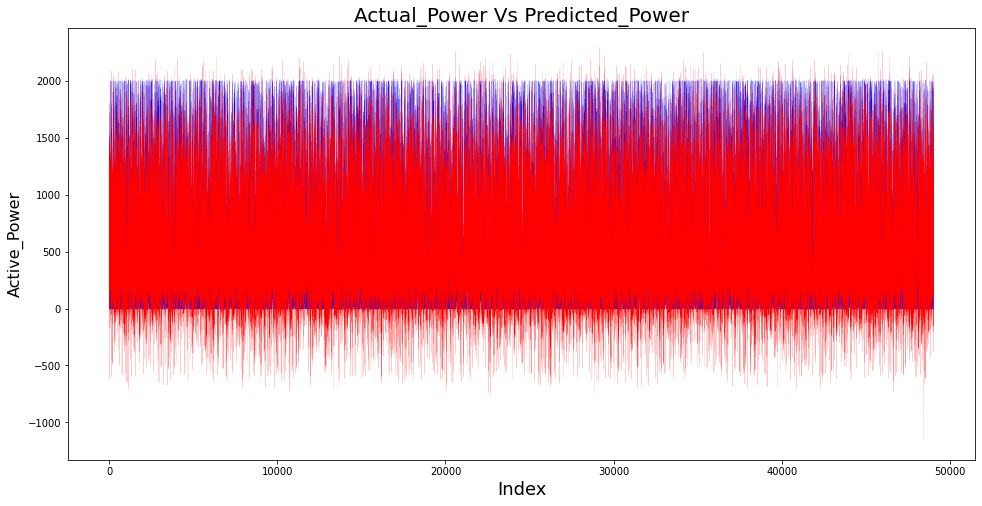

In [50]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred4, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x4_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x4_train.values, i) 
                          for i in range(len(x4_train.columns))] 
  
print(vif_data)

                      feature            VIF
0            Avg_Ambient_Temp      69.931381
1             Avg_Pitch_Angle      13.608564
2             Avg_Rotor_Speed     137.953312
3              Avg_Wind_Speed      43.748536
4             Bearing_DE_Temp     411.876170
5        Gearbox_bearing_Temp    2742.710813
6            Gearbox_oil_Temp    2652.418117
7       Generator_wind_Temp_1  230826.581554
8       Generator_wind_Temp_2  231643.128321
9       Generator_wind_Temp_3    4566.958546
10  Generators_sliprings_Temp     421.338858
11   Hidraulic_group_pressure      81.347775
12          Trafo_1_wind_Temp     306.452596
13          Trafo_2_wind_Temp     272.843233
14          Trafo_3_wind_Temp     281.161026


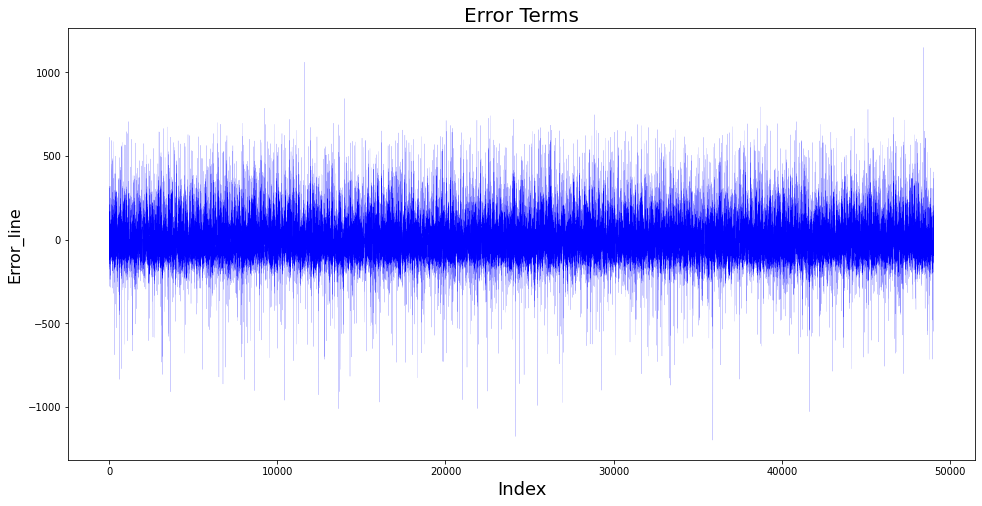

In [52]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred4, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred4)
r_squared = r2_score(y_test, y_pred4)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 19200.959868118574
r_square_value : 0.937 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-6`

In [54]:
x5_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1',
                    'Generator_wind_Temp_3', 'Generators_sliprings_Temp', 'Hidraulic_group_pressure', 'Trafo_1_wind_Temp',
                    'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]
x5_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1',
                    'Generator_wind_Temp_3', 'Generators_sliprings_Temp', 'Hidraulic_group_pressure', 'Trafo_1_wind_Temp',
                    'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]

'Generator_wind_Temp_1', 'Generator_wind_Temp_2' These varibles are Auto Correlated each other. So, i removed one variable ('Generator_wind_Temp_2')

In [55]:
lr5 = lr.fit(x5_train,y_train)

In [56]:
y_pred5 = lr5.predict(x5_test)

In [57]:
import statsmodels.api as sm
x5_train_sm = x5_train

x5_train_sm = sm.add_constant(x5_train_sm)

mlm5 = sm.OLS(y_train,x5_train_sm).fit()

mlm5.params
print(mlm5.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.022e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:31   Log-Likelihood:            -1.2484e+06
No. Observations:              196159   AIC:                         2.497e+06
Df Residuals:                  196144   BIC:                         2.497e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

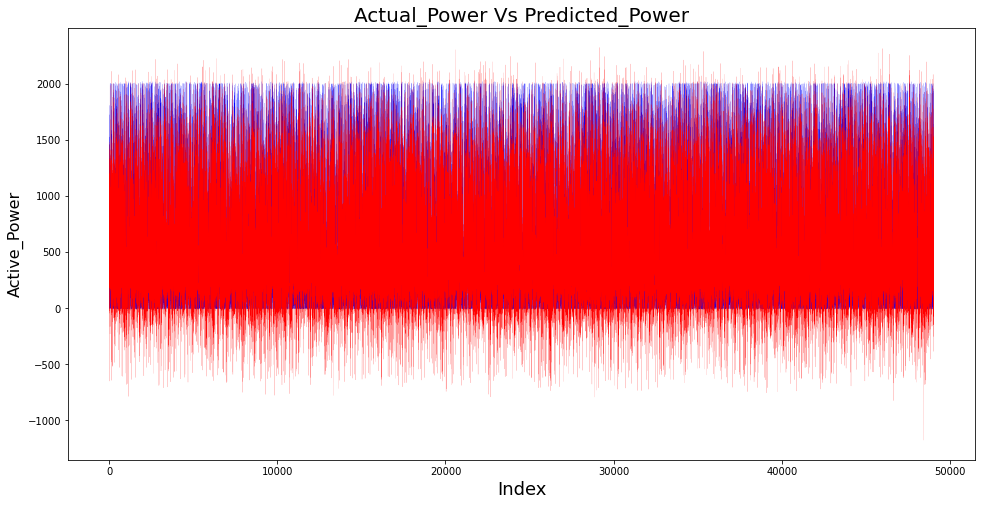

In [58]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred5, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x5_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x5_train.values, i) 
                          for i in range(len(x5_train.columns))] 
  
print(vif_data)

                      feature          VIF
0            Avg_Ambient_Temp    69.503414
1             Avg_Pitch_Angle    11.769708
2             Avg_Rotor_Speed   137.732875
3              Avg_Wind_Speed    41.224769
4             Bearing_DE_Temp   411.291111
5        Gearbox_bearing_Temp  2737.457889
6            Gearbox_oil_Temp  2601.629653
7       Generator_wind_Temp_1  4492.552730
8       Generator_wind_Temp_3  4566.868338
9   Generators_sliprings_Temp   420.397298
10   Hidraulic_group_pressure    81.121386
11          Trafo_1_wind_Temp   300.566284
12          Trafo_2_wind_Temp   269.594255
13          Trafo_3_wind_Temp   278.373809


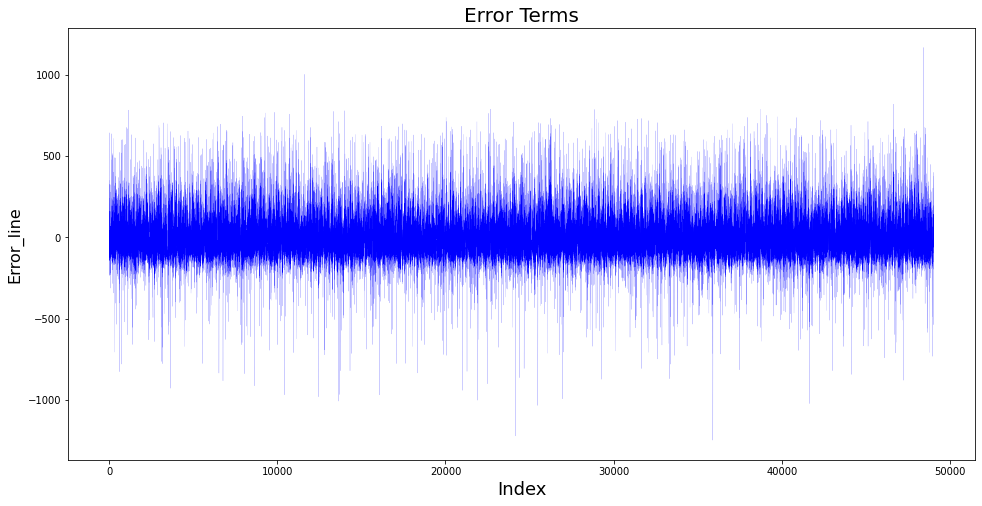

In [60]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred5, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred5)
r_squared = r2_score(y_test, y_pred5)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 19596.03455227658
r_square_value : 0.935 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-7`

In [62]:
x6_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]
x6_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]

'Generator_wind_Temp_1', 'Generator_wind_Temp_3' These varibles are Auto Correlated each other. So, i removed one variable ('Generator_wind_Temp_3')

In [63]:
lr6 = lr.fit(x6_train,y_train)

In [64]:
y_pred6 = lr6.predict(x6_test)

In [65]:
import statsmodels.api as sm
x6_train_sm = x6_train

x6_train_sm = sm.add_constant(x6_train_sm)

mlm6 = sm.OLS(y_train,x6_train_sm).fit()

mlm6.params
print(mlm6.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.023e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:37   Log-Likelihood:            -1.2551e+06
No. Observations:              196159   AIC:                         2.510e+06
Df Residuals:                  196145   BIC:                         2.510e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

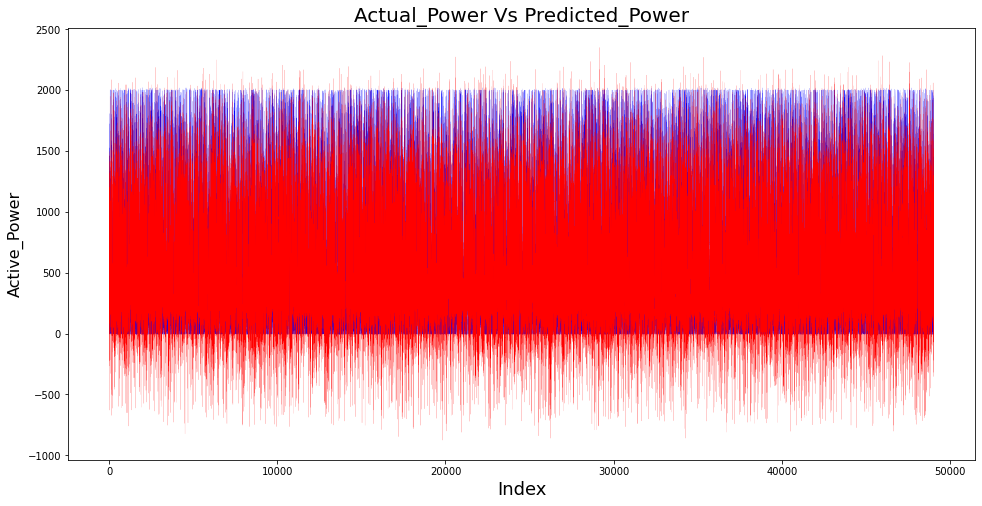

In [66]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred6, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x6_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x6_train.values, i) 
                          for i in range(len(x6_train.columns))] 
  
print(vif_data)

                      feature          VIF
0            Avg_Ambient_Temp    68.670256
1             Avg_Pitch_Angle    11.569321
2             Avg_Rotor_Speed   136.876007
3              Avg_Wind_Speed    41.172345
4             Bearing_DE_Temp   410.596555
5        Gearbox_bearing_Temp  2695.365135
6            Gearbox_oil_Temp  2568.161972
7       Generator_wind_Temp_1   289.828345
8   Generators_sliprings_Temp   408.753682
9    Hidraulic_group_pressure    81.101311
10          Trafo_1_wind_Temp   300.300197
11          Trafo_2_wind_Temp   269.403294
12          Trafo_3_wind_Temp   277.515705


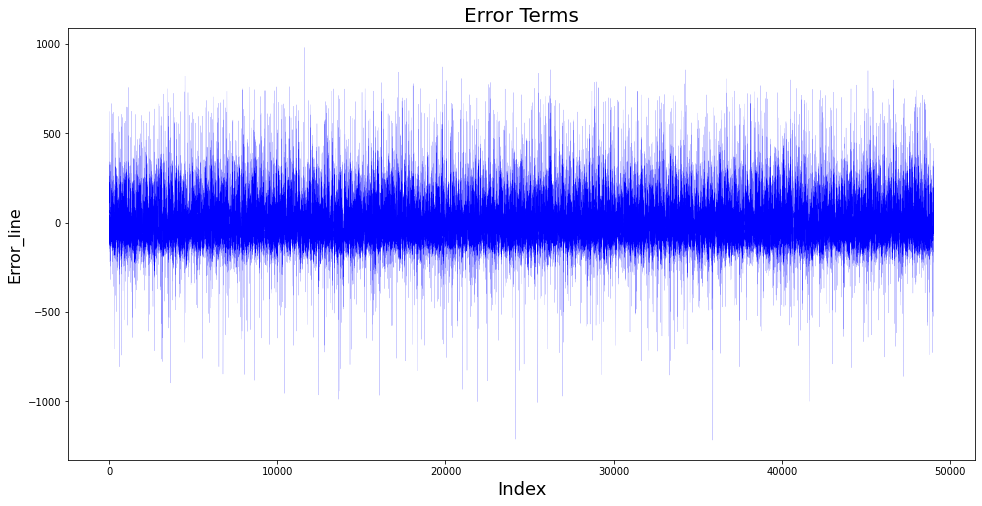

In [68]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred6, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred6)
r_squared = r2_score(y_test, y_pred6)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 20977.0031614993
r_square_value : 0.931 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-8`

In [70]:
x7_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]
x7_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_bearing_Temp', 'Gearbox_oil_Temp', 'Generator_wind_Temp_1', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]

'Trafo_1_wind_Temp', 'Trafo_2_wind_Temp' These varibles are Auto Correlated each other. So, i removed one variable ('Trafo_1_wind_Temp')

In [71]:
lr7 = lr.fit(x7_train,y_train)

In [72]:
y_pred7 = lr7.predict(x7_test)

In [73]:
import statsmodels.api as sm
x7_train_sm = x7_train

x7_train_sm = sm.add_constant(x7_train_sm)

mlm7 = sm.OLS(y_train,x7_train_sm).fit()

mlm7.params
print(mlm7.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.182e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:44   Log-Likelihood:            -1.2555e+06
No. Observations:              196159   AIC:                         2.511e+06
Df Residuals:                  196146   BIC:                         2.511e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

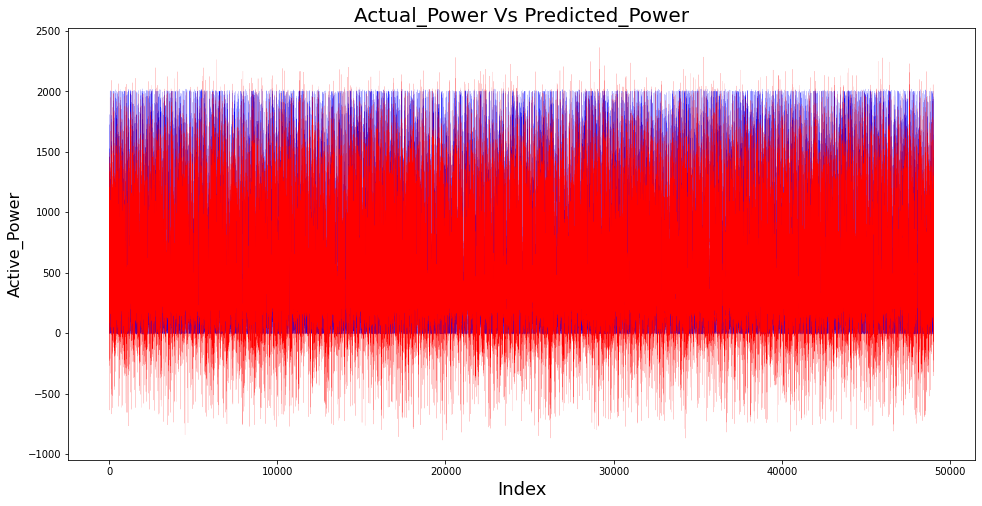

In [74]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred7, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x7_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x7_train.values, i) 
                          for i in range(len(x7_train.columns))] 
  
print(vif_data)

                      feature          VIF
0            Avg_Ambient_Temp    67.113971
1             Avg_Pitch_Angle    11.360998
2             Avg_Rotor_Speed   135.742639
3              Avg_Wind_Speed    41.169139
4             Bearing_DE_Temp   407.308201
5        Gearbox_bearing_Temp  2679.419095
6            Gearbox_oil_Temp  2524.926123
7       Generator_wind_Temp_1   281.508267
8   Generators_sliprings_Temp   408.074206
9    Hidraulic_group_pressure    81.100535
10          Trafo_2_wind_Temp   121.867959
11          Trafo_3_wind_Temp   214.358740


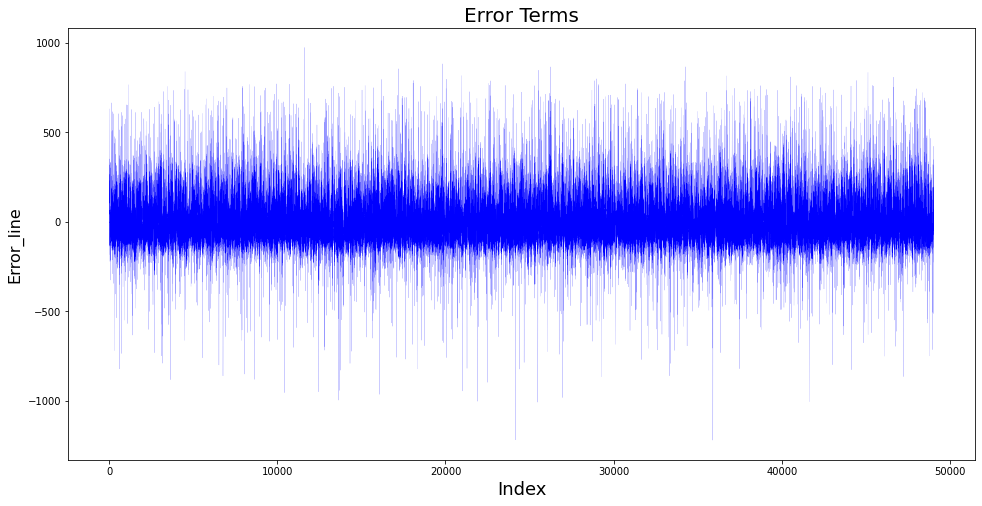

In [76]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred7, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred7)
r_squared = r2_score(y_test, y_pred7)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 21034.474288578378
r_square_value : 0.93 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-9`

In [78]:
x8_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_oil_Temp', 'Generator_wind_Temp_1', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]
x8_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Gearbox_oil_Temp', 'Generator_wind_Temp_1', 'Generators_sliprings_Temp',
                    'Hidraulic_group_pressure', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp']]

'Gearbox_bearing_Temp', 'Gearbox_oil_Temp' These varibles are Auto Correlated each other. So, i removed one variable ('Gearbox_bearing_Temp')

In [79]:
lr8 = lr.fit(x8_train,y_train)

In [80]:
y_pred8 = lr8.predict(x8_test)

In [81]:
import statsmodels.api as sm
x8_train_sm = x8_train

x8_train_sm = sm.add_constant(x8_train_sm)

mlm8 = sm.OLS(y_train,x8_train_sm).fit()

mlm8.params
print(mlm8.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.380e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:49   Log-Likelihood:            -1.2555e+06
No. Observations:              196159   AIC:                         2.511e+06
Df Residuals:                  196147   BIC:                         2.511e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

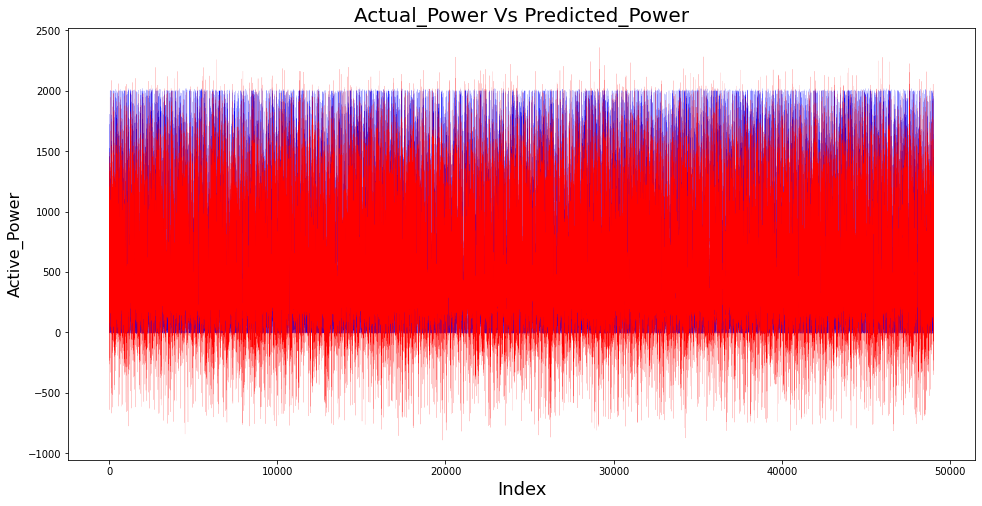

In [82]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred8, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x8_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x8_train.values, i) 
                          for i in range(len(x8_train.columns))] 
  
print(vif_data)

                      feature         VIF
0            Avg_Ambient_Temp   65.952156
1             Avg_Pitch_Angle   11.302001
2             Avg_Rotor_Speed  122.102926
3              Avg_Wind_Speed   40.566746
4             Bearing_DE_Temp  404.377687
5            Gearbox_oil_Temp  495.460649
6       Generator_wind_Temp_1  280.816467
7   Generators_sliprings_Temp  385.166722
8    Hidraulic_group_pressure   80.314856
9           Trafo_2_wind_Temp  120.734064
10          Trafo_3_wind_Temp  210.089479


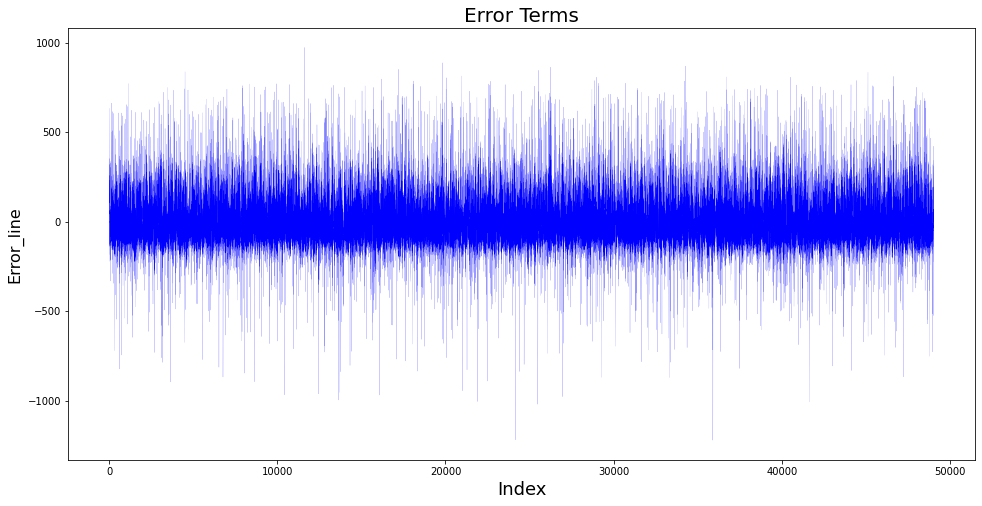

In [84]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred8, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred8)
r_squared = r2_score(y_test, y_pred8)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 21034.049515555536
r_square_value : 0.93 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-10`

In [86]:
x9_train = x_train[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                    'Generator_wind_Temp_1', 'Generators_sliprings_Temp', 'Gearbox_oil_Temp']]
x9_test = x_test[['Avg_Ambient_Temp', 'Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed', 'Bearing_DE_Temp',
                  'Generator_wind_Temp_1', 'Generators_sliprings_Temp', 'Gearbox_oil_Temp']]

'Hidraulic_group_pressure', 'Trafo_2_wind_Temp', 'Trafo_3_wind_Temp' These varibles are Auto Correlated. So, i removed the variable

In [87]:
lr9 = lr.fit(x9_train,y_train)

In [88]:
y_pred9 = lr9.predict(x9_test)

In [89]:
import statsmodels.api as sm
x9_train_sm = x9_train

x9_train_sm = sm.add_constant(x9_train_sm)

mlm9 = sm.OLS(y_train,x9_train_sm).fit()

mlm9.params
print(mlm9.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.206e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:54   Log-Likelihood:            -1.2574e+06
No. Observations:              196159   AIC:                         2.515e+06
Df Residuals:                  196150   BIC:                         2.515e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

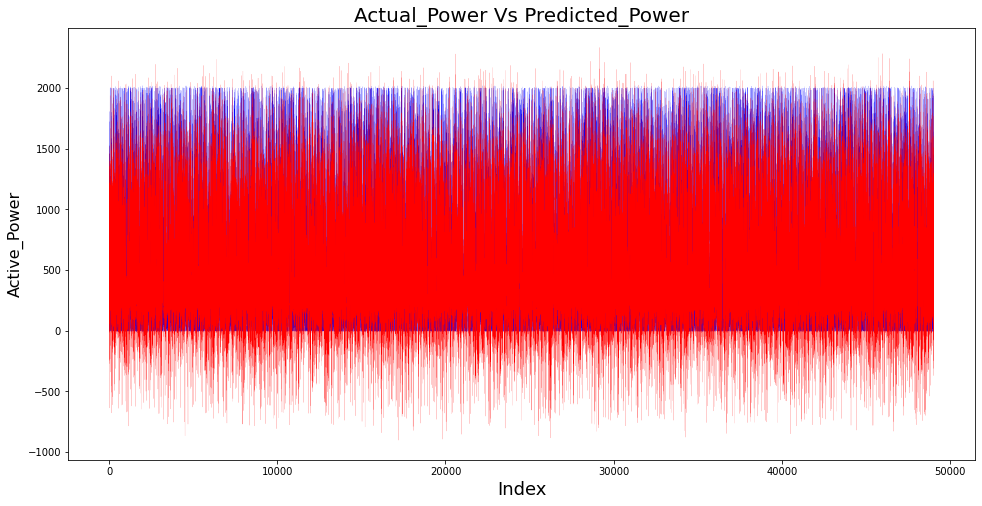

In [90]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred9, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x9_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x9_train.values, i) 
                          for i in range(len(x9_train.columns))] 
  
print(vif_data)

                     feature         VIF
0           Avg_Ambient_Temp   63.729292
1            Avg_Pitch_Angle    9.520462
2            Avg_Rotor_Speed  112.348573
3             Avg_Wind_Speed   39.174582
4            Bearing_DE_Temp  400.707358
5      Generator_wind_Temp_1  264.268772
6  Generators_sliprings_Temp  383.082762
7           Gearbox_oil_Temp  230.627366


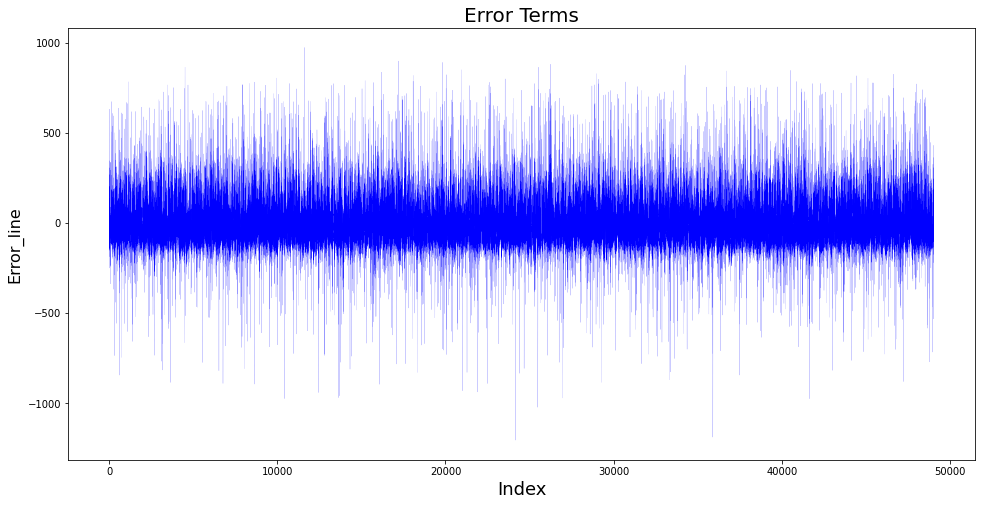

In [92]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred9, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred9)
r_squared = r2_score(y_test, y_pred9)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 21443.519337970352
r_square_value : 0.929 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


#### `MODEL-10`

In [94]:
x10_train = x_train[['Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed']]
x10_test = x_test[['Avg_Pitch_Angle', 'Avg_Rotor_Speed', 'Avg_Wind_Speed']]

Removed all temperature variables.

In [95]:
lr10 = lr.fit(x10_train,y_train)

In [96]:
y_pred10 = lr10.predict(x10_test)

In [97]:
import statsmodels.api as sm
x10_train_sm = x10_train

x10_train_sm = sm.add_constant(x10_train_sm)

mlm10 = sm.OLS(y_train,x10_train_sm).fit()

mlm10.params
print(mlm10.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_Active_Power   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 5.930e+05
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        00:41:58   Log-Likelihood:            -1.2903e+06
No. Observations:              196159   AIC:                         2.581e+06
Df Residuals:                  196155   BIC:                         2.581e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1667.8072      2.493   -6

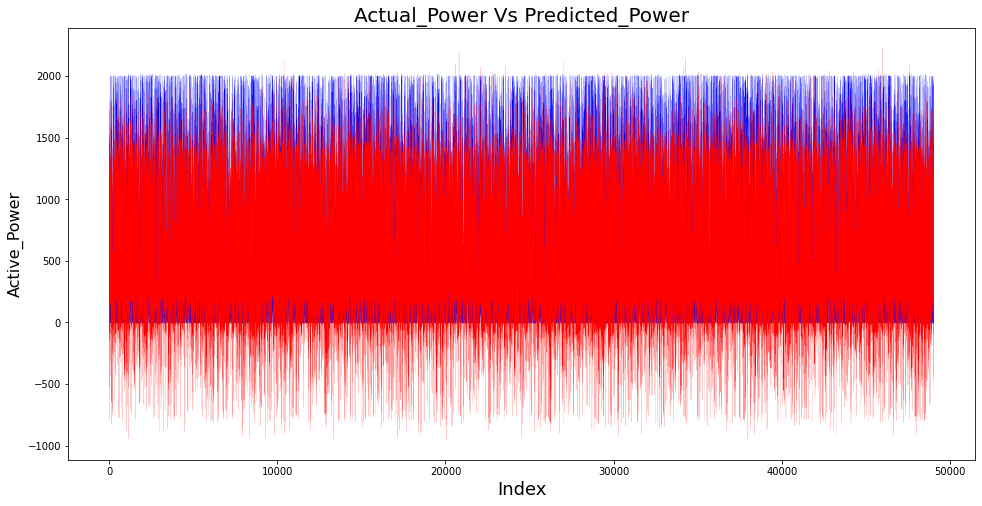

In [98]:
#Actual vs Predicted
c = [i for i in range(1,49041,1)]
plt.plot(c,y_test, color="blue", linewidth=0.1, linestyle="-")
plt.plot(c,y_pred10, color="red",  linewidth=0.1, linestyle="-")
plt.title('Actual_Power Vs Predicted_Power', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Active_Power', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x10_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x10_train.values, i) 
                          for i in range(len(x10_train.columns))] 
  
print(vif_data)

           feature        VIF
0  Avg_Pitch_Angle   1.699851
1  Avg_Rotor_Speed  15.872537
2   Avg_Wind_Speed  16.956543


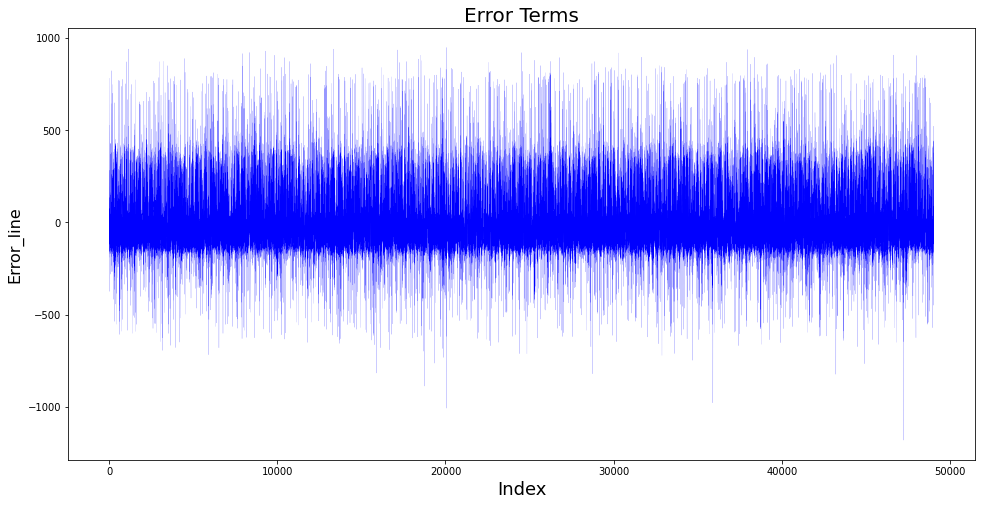

In [100]:
c = [i for i in range(1,49041,1)]

plt.plot(c,y_test-y_pred10, color="blue", linewidth=0.1, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error_line', fontsize=16) 
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.5, top=1.6)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred10)
r_squared = r2_score(y_test, y_pred10)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', round(r_squared,3),"% Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed")

Mean_Squared_Error : 30233.20183664925
r_square_value : 0.9 % Variance of the Active Power is Explained by the Wind Speed, Pitch Angle and Rotor Speed


`REGRESSION EQUATION`

In [102]:
@widgets.interact(Wind_Speed = range(1, 25, 1), 
                  Pitch_Angle = range(1, 95, 1), Rotor_Speed = range(1, 20, 1))
def Regression_Equation(Wind_Speed, Pitch_Angle, Rotor_Speed):
    Intercept = mlm10.params[0]
    Coefficient = mlm10.params[1]*Pitch_Angle + mlm10.params[2]*Rotor_Speed + mlm10.params[3]*Wind_Speed
    
    y_Predicted = Intercept + Coefficient  # y = a + bx  Equation.
    if y_Predicted < 0:
        print("Please Choose Other Values: Active Power is '0' at these values")
    else:
        print('Active Power Predicted: ',y_Predicted)  # Basic Starting Values are 3, 77, 1

interactive(children=(Dropdown(description='Wind_Speed', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…